In [18]:
# Load packages
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import scipy as scp
import scipy.stats as scps
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime
import time
import scipy.optimize as scp_opt
from scipy.stats import mode
from sklearn.linear_model import LinearRegression
from statsmodels.distributions.empirical_distribution import ECDF

In [19]:
def get_r2_vec(estimates = [0, 0, 0],
               ground_truths = [0, 0, 0]):
    """Function reads in parameter estimates and group truths and returns regression function"""
    r2_vec = []
    for i in range(estimates.shape[1]):
        reg = LinearRegression().fit(np.asmatrix(estimates[:, i]).T, np.asmatrix(ground_truths[:, i]).T)
        r2_vec.append(str(round(reg.score(np.asmatrix(estimates[:, i]).T, np.asmatrix(ground_truths[:, i]).T), 2)))
    return r2_vec

In [20]:
# Plot settings
matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

In [21]:
ddm_mlp_analytic_1024 = pickle.load(open('/Users/afengler/OneDrive/project_nn_likelihoods/data/analytic/ddm/method_comparison/dnnregressor_ddm_analytic_05_24_20_10_47_30/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_1024_init_mle.pickle', 
                     'rb'))
ddm_mlp_20k_1024 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/data/kde/ddm/method_comparison/dnnregressor_ddm_05_03_20_18_30_30/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_1024_init_mle.pickle', 
                     'rb'))
ddm_mlp_100k_1024 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/data/kde/ddm' + \
                     '/method_comparison/dnnregressor_ddm_09_26_20_08_52_12/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_1024_init_mle.pickle', 
                     'rb'))
ddm_analytic_1024 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/data/analytic/ddm/method_comparison/analytic/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_1024_init_mle.pickle', 
                     'rb'))
ddm_cnn_100k_1024 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/eLIFE_exps/summaries/IS_summary_elife_ddm_N_1024.pickle', 
                                     'rb'))

new_ids_mlp_20k = []
new_ids_mlp_100k = []
new_ids_mlp_analytic = []
new_ids_analytic = []
new_ids_cnn_100k = []
      
# filter for 1024 ddm
for i in range(990):
    eq_cnt_0 = 0
    eq_cnt_1 = 0
    eq_cnt_2 = 0
    eq_cnt_3 = 0
    for j in range(1000):
        if np.array_equal(ddm_analytic_1024['gt'][i, :], ddm_mlp_20k_1024['gt'][j, :]):
            append_id_20k = j
            eq_cnt_2 += 1
        if np.array_equal(ddm_analytic_1024['gt'][i, :], ddm_mlp_100k_1024['gt'][j, :]):
            append_id_100k = j
            eq_cnt_0 += 1
        if np.array_equal(ddm_analytic_1024['gt'][i, :], ddm_mlp_analytic_1024['gt'][j, :]):
            append_id_mlp_analytic = j
            eq_cnt_1 += 1
        if np.array_equal(ddm_analytic_1024['gt'][i, :], ddm_cnn_100k_1024['gt'][j, :]):
            append_id_cnn = j
            eq_cnt_3 += 1
            
    if eq_cnt_0 == 0 or eq_cnt_1 == 0 or eq_cnt_2 == 0 or eq_cnt_3 == 0:
        #print(eq_cnt_0)
        #print(eq_cnt_1)
        #print(eq_cnt_2)
        #print(ddm_analytic_1024['gt'][i, :])
        #print(i)
        pass
    
    else:
        new_ids_mlp_20k.append(append_id_20k)
        new_ids_mlp_100k.append(append_id_100k)
        new_ids_mlp_analytic.append(append_id_mlp_analytic)
        new_ids_analytic.append(i)
        new_ids_cnn_100k.append(append_id_cnn)
    if i % 100 == 0:
        print(i)
        
ddm_analytic_1024['gt'] = ddm_analytic_1024['gt'][new_ids_analytic, :] 
ddm_analytic_1024['posterior_samples'] = ddm_analytic_1024['posterior_samples'][new_ids_analytic, :, :]
ddm_analytic_1024['data'] = ddm_analytic_1024['data'][new_ids_analytic, : , :]

ddm_mlp_20k_1024['gt'] = ddm_mlp_20k_1024['gt'][new_ids_mlp_20k, :]
ddm_mlp_20k_1024['posterior_samples'] = ddm_mlp_20k_1024['posterior_samples'][new_ids_mlp_20k, :, :]
ddm_mlp_20k_1024['data'] = ddm_mlp_20k_1024['data'][new_ids_mlp_20k, : , :]


ddm_mlp_100k_1024['gt'] = ddm_mlp_100k_1024['gt'][new_ids_mlp_100k, :]
ddm_mlp_100k_1024['posterior_samples'] = ddm_mlp_100k_1024['posterior_samples'][new_ids_mlp_100k, :, :]
ddm_mlp_100k_1024['data'] = ddm_mlp_100k_1024['data'][new_ids_mlp_100k, : , :]

ddm_mlp_analytic_1024['gt'] = ddm_mlp_analytic_1024['gt'][new_ids_mlp_analytic, :]
ddm_mlp_analytic_1024['posterior_samples'] = ddm_mlp_analytic_1024['posterior_samples'][new_ids_mlp_analytic, :, :]
ddm_mlp_analytic_1024['data'] = ddm_mlp_analytic_1024['data'][new_ids_mlp_analytic, : , :]

ddm_cnn_100k_1024['gt'] = ddm_cnn_100k_1024['gt'][new_ids_cnn_100k, :]
ddm_cnn_100k_1024['posterior_samples'] = ddm_cnn_100k_1024['posterior_samples'][new_ids_cnn_100k, :, :]
ddm_cnn_100k_1024['data'] = ddm_cnn_100k_1024['data'][new_ids_cnn_100k, : , :]

# Filter out unbalanced datasets
ok_ids = (np.abs(np.sum(ddm_analytic_1024['data'][:, :, 1], axis = 1)) < 925)
print(np.sum(ok_ids))

ddm_analytic_1024['posterior_variance'] = np.sqrt(ddm_analytic_1024['posterior_samples'].var(axis = 1))
ddm_mlp_20k_1024['posterior_variance'] = np.sqrt(ddm_mlp_20k_1024['posterior_samples'].var(axis = 1))
ddm_mlp_100k_1024['posterior_variance'] = np.sqrt(ddm_mlp_100k_1024['posterior_samples'].var(axis = 1))
ddm_mlp_analytic_1024['posterior_variance'] = np.sqrt(ddm_mlp_analytic_1024['posterior_samples'].var(axis = 1))
ddm_cnn_100k_1024['posterior_variance'] = np.sqrt(ddm_cnn_100k_1024['posterior_samples'].var(axis = 1))

0
100
200
300
400
500
600
700
800
900
515


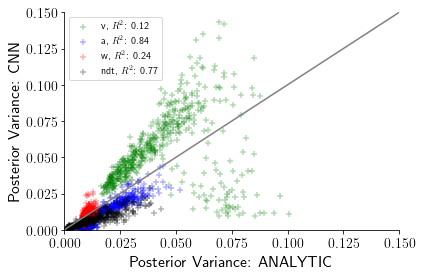

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)
my_r2vecs = get_r2_vec(estimates = ddm_cnn_100k_1024['posterior_variance'][ok_ids, :],
                       ground_truths = ddm_analytic_1024['posterior_variance'][ok_ids,:])

# grayscale_map = plt.get_cmap('gray')
# normalized_vs = ddm_analytic_1024['gt'][ok_ids, 0] / (np.max(ddm_analytic_1024['gt'][ok_ids, 0]) - np.min(ddm_analytic_1024['gt'][ok_ids, 0]))
# normalized_as = ddm_analytic_1024['gt'][ok_ids, 1] / (np.max(ddm_analytic_1024['gt'][ok_ids, 1]) - np.min(ddm_analytic_1024['gt'][ok_ids, 1]))

ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids, 0],
           ddm_cnn_100k_1024['posterior_variance'][ok_ids, 0], 
           color = 'green', #grayscale_map(normalized_as), 
           alpha = 0.3, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids, 1], 
           ddm_cnn_100k_1024['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.3, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a 
ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids, 2], 
           ddm_cnn_100k_1024['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.3, 
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids, 3],
           ddm_cnn_100k_1024['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.3, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt

ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: CNN", size = 16)

ax.set_xlim((0, 0.15))
ax.set_ylim((0, 0.15))
ax.plot(np.linspace(0, 0.15, 100), np.linspace(0, 0.15, 100), c = 'grey')

ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')



fig_dir = os.getcwd() + '/figures/cnn/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_analytic_vs_cnn_100k_n_1024_posterior_variance.svg',
            format = 'svg',
            transparent = True,
            frameon = False)

In [ ]:
f

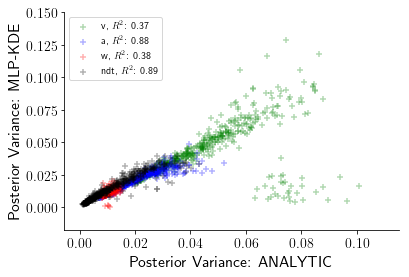

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)
my_r2vecs = get_r2_vec(estimates = ddm_mlp_20k_1024['posterior_variance'][ok_ids, :],
                       ground_truths = ddm_analytic_1024['posterior_variance'][ok_ids,:]
)

ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids,0],
           ddm_mlp_20k_1024['posterior_variance'][ok_ids, 0], 
           color = 'green', 
           alpha = 0.3, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids,1], 
           ddm_mlp_20k_1024['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.3, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a 
ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids,2], 
           ddm_mlp_20k_1024['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.3, 
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids, 3],
           ddm_mlp_20k_1024['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.3, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt

ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: MLP-KDE", size = 16)

ax.set_xlim((0, 0.15))
ax.set_ylim((0, 0.15))
ax.plot(np.linspace(0, 0.15, 100), np.linspace(0, 0.15, 100), c = 'red')



ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')

fig_dir = os.getcwd() + '/figures/mlp/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_analytic_vs_mlp_20k_n_1024_posterior_variance.svg',
            format = 'svg',
            transparent = True,
            frameon = False)

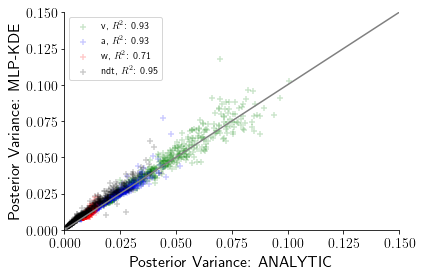

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)
my_r2vecs = get_r2_vec(estimates = ddm_mlp_100k_1024['posterior_variance'][ok_ids, :] ,
                       ground_truths = ddm_analytic_1024['posterior_variance'][ok_ids, :])

ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids,0],
           ddm_mlp_100k_1024['posterior_variance'][ok_ids, 0], 
           color = 'green', 
           alpha = 0.2, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids,1], 
           ddm_mlp_100k_1024['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.2, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a 
ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids,2], 
           ddm_mlp_100k_1024['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.2, 
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids,3],
           ddm_mlp_100k_1024['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.2, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt


ax.set_xlim((0, 0.15))
ax.set_ylim((0, 0.15))
ax.plot(np.linspace(0, 0.15, 100), np.linspace(0, 0.15, 100), c = 'grey')



ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: MLP-KDE", size = 16)
ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')

fig_dir = os.getcwd() + '/figures/mlp/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_analytic_vs_mlp_100k_n_1024_posterior_variance.svg',
            format = 'svg',
            transparent = True,
            frameon = False)

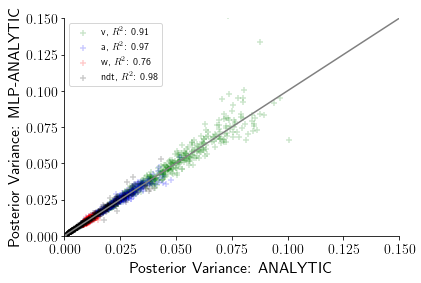

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)
my_r2vecs = get_r2_vec(estimates = ddm_mlp_analytic_1024['posterior_variance'][ok_ids, :],
                       ground_truths = ddm_analytic_1024['posterior_variance'][ok_ids,:])


ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids, 0],
           ddm_mlp_analytic_1024['posterior_variance'][ok_ids, 0], 
           color = 'green', 
           alpha = 0.2, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids, 1], 
           ddm_mlp_analytic_1024['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.2, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a 
ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids, 2], 
           ddm_mlp_analytic_1024['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.2, 
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_analytic_1024['posterior_variance'][ok_ids, 3],
           ddm_mlp_analytic_1024['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.2, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt

ax.set_xlim((0, 0.15))
ax.set_ylim((0, 0.15))
ax.plot(np.linspace(0, 0.15, 100), np.linspace(0, 0.15, 100), c = 'grey')


ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: MLP-ANALYTIC", size = 16)
ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')

fig_dir = os.getcwd() + '/figures/mlp/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_analytic_vs_mlp_analytic_n_1024_posterior_variance.svg',
            format = 'svg',
            transparent = True,
            frameon = False)

In [47]:
ddm_mlp_analytic_4096 = pickle.load(open('/Users/afengler/OneDrive/project_nn_likelihoods/data/analytic/ddm/method_comparison/dnnregressor_ddm_analytic_05_24_20_10_47_30/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_4096_init_mle.pickle', 
                     'rb'))
ddm_mlp_20k_4096 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/data/kde/ddm/method_comparison/dnnregressor_ddm_05_03_20_18_30_30/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_4096_init_mle.pickle', 
                     'rb'))
ddm_mlp_100k_4096 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/data/kde/ddm' + \
                     '/method_comparison/dnnregressor_ddm_09_26_20_08_52_12/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_4096_init_mle.pickle', 
                     'rb'))
ddm_analytic_4096 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/data/analytic/ddm/method_comparison/analytic/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_4096_init_mle.pickle', 
                     'rb'))
ddm_cnn_100k_4096 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/eLIFE_exps/summaries/IS_summary_ddm_N_4096.pickle', 
                                     'rb'))


new_ids_mlp_20k = []
new_ids_mlp_100k = []
new_ids_mlp_analytic = []
new_ids_analytic = []
new_ids_cnn_100k = []

# filter for 1024 ddm
for i in range(990):
    eq_cnt_0 = 0
    eq_cnt_1 = 0
    eq_cnt_2 = 0
    eq_cnt_3 = 0
    for j in range(999):
        if np.array_equal(ddm_analytic_4096['gt'][i, :], ddm_mlp_20k_4096['gt'][j, :]):
            append_id_20k = j
            eq_cnt_2 += 1
        if np.array_equal(ddm_analytic_4096['gt'][i, :], ddm_mlp_100k_4096['gt'][j, :]):
            append_id_100k = j
            eq_cnt_0 += 1
        if np.array_equal(ddm_analytic_4096['gt'][i, :], ddm_mlp_analytic_4096['gt'][j, :]):
            append_id_mlp_analytic = j
            eq_cnt_1 += 1
        if np.array_equal(ddm_analytic_4096['gt'][i, :], ddm_cnn_100k_4096['gt'][j, :]):
            append_id_cnn = j
            eq_cnt_3 += 1

    if eq_cnt_0 == 0 or eq_cnt_1 == 0 or eq_cnt_2 == 0 or eq_cnt_3 == 0:
        pass
#         print(eq_cnt_0)
#         print(eq_cnt_1)
#         print(eq_cnt_2)
#         print(ddm_analytic_4096['gt'][i, :])
#         print(i)
    
    else:
        new_ids_mlp_20k.append(append_id_20k)
        new_ids_mlp_100k.append(append_id_100k)
        new_ids_mlp_analytic.append(append_id_mlp_analytic)
        new_ids_analytic.append(i)
        new_ids_cnn_100k.append(append_id_cnn)
    if i % 100 == 0:
        print(i)
              
ddm_analytic_4096['gt'] = ddm_analytic_4096['gt'][new_ids_analytic, :] 
ddm_analytic_4096['posterior_samples'] = ddm_analytic_4096['posterior_samples'][new_ids_analytic, :, :]
ddm_analytic_4096['data'] = ddm_analytic_4096['data'][new_ids_analytic, : , :]

ddm_mlp_20k_4096['gt'] = ddm_mlp_20k_4096['gt'][new_ids_mlp_20k, :]
ddm_mlp_20k_4096['posterior_samples'] = ddm_mlp_20k_4096['posterior_samples'][new_ids_mlp_20k, :, :]
ddm_mlp_20k_4096['data'] = ddm_mlp_20k_4096['data'][new_ids_mlp_20k, : , :]


ddm_mlp_100k_4096['gt'] = ddm_mlp_100k_4096['gt'][new_ids_mlp_100k, :]
ddm_mlp_100k_4096['posterior_samples'] = ddm_mlp_100k_4096['posterior_samples'][new_ids_mlp_100k, :, :]
ddm_mlp_100k_4096['data'] = ddm_mlp_100k_4096['data'][new_ids_mlp_100k, : , :]

ddm_mlp_analytic_4096['gt'] = ddm_mlp_analytic_4096['gt'][new_ids_mlp_analytic, :]
ddm_mlp_analytic_4096['posterior_samples'] = ddm_mlp_analytic_4096['posterior_samples'][new_ids_mlp_analytic, :, :]
ddm_mlp_analytic_4096['data'] = ddm_mlp_analytic_4096['data'][new_ids_mlp_analytic, : , :]

ddm_cnn_100k_4096['gt'] = ddm_cnn_100k_4096['gt'][new_ids_cnn_100k, :]
ddm_cnn_100k_4096['posterior_samples'] = ddm_cnn_100k_4096['posterior_samples'][new_ids_cnn_100k, :, :]
ddm_cnn_100k_4096['data'] = ddm_cnn_100k_4096['data'][new_ids_cnn_100k, : , :]

# # Filter out unbalanced datasets
ok_ids = np.abs(np.sum(ddm_analytic_4096['data'][:, :, 1], axis = 1)) < 3686

ddm_analytic_4096['posterior_variance'] = np.sqrt(ddm_analytic_4096['posterior_samples'].var(axis = 1))
ddm_mlp_20k_4096['posterior_variance'] = np.sqrt(ddm_mlp_20k_4096['posterior_samples'].var(axis = 1))
ddm_mlp_100k_4096['posterior_variance'] = np.sqrt(ddm_mlp_100k_4096['posterior_samples'].var(axis = 1))
ddm_mlp_analytic_4096['posterior_variance'] = np.sqrt(ddm_mlp_analytic_4096['posterior_samples'].var(axis = 1))
ddm_cnn_100k_4096['posterior_variance'] = np.sqrt(ddm_cnn_100k_4096['posterior_samples'].var(axis = 1))


0
100
200
300
400
500
600
700
800
900


In [46]:
ddm_cnn_100k_4096['posterior_samples'].mean(axis = 1)[:,3].max()

1.0437851673191065

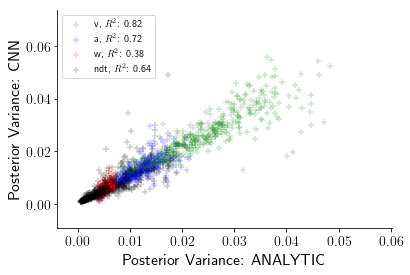

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)
my_r2vecs = get_r2_vec(estimates = ddm_cnn_100k_4096['posterior_variance'][ok_ids, :],
                       ground_truths = ddm_analytic_4096['posterior_variance'][ok_ids, :])

ax.scatter(ddm_analytic_4096['posterior_variance'][ok_ids, 0],
           ddm_cnn_100k_4096['posterior_variance'][ok_ids, 0], 
           color = 'green', 
           alpha = 0.2, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_analytic_4096['posterior_variance'][ok_ids, 1], 
           ddm_cnn_100k_4096['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.2, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a 
ax.scatter(ddm_analytic_4096['posterior_variance'][ok_ids, 2], 
           ddm_cnn_100k_4096['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.2, 
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_analytic_4096['posterior_variance'][ok_ids, 3],
           ddm_cnn_100k_4096['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.2, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt

ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: CNN", size = 16)
ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')

fig_dir = os.getcwd() + '/figures/cnn/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_analytic_vs_cnn_100k_n_4096_posterior_variance.svg',
            format = 'svg',
            transparent = True,
            frameon = False)

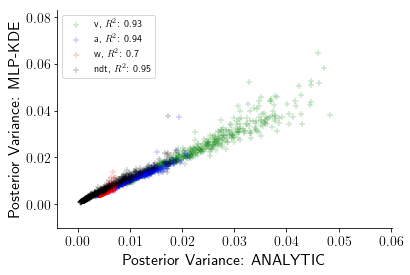

In [113]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)


my_r2vecs = get_r2_vec(estimates = ddm_mlp_100k_4096['posterior_variance'][ok_ids, :],
                       ground_truths = ddm_analytic_4096['posterior_variance'][ok_ids, :])

ax.scatter(ddm_analytic_4096['posterior_variance'][ok_ids,0],
           ddm_mlp_100k_4096['posterior_variance'][ok_ids, 0], 
           color = 'green', 
           alpha = 0.2, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_analytic_4096['posterior_variance'][ok_ids,1], 
           ddm_mlp_100k_4096['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.2, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a 
ax.scatter(ddm_analytic_4096['posterior_variance'][ok_ids,2], 
           ddm_mlp_100k_4096['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.2, 
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_analytic_4096['posterior_variance'][ok_ids,3],
           ddm_mlp_100k_4096['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.2, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt

ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: MLP-KDE", size = 16)
ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')

fig_dir = os.getcwd() + '/figures/mlp/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_analytic_vs_mlp_100k_n_4096_posterior_variance.svg',
            format = 'svg',
            transparent = True,
            frameon = False)

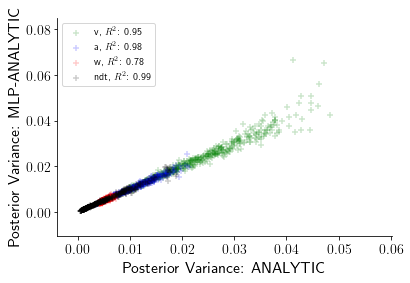

In [116]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)
my_r2vecs = get_r2_vec(estimates = ddm_mlp_analytic_4096['posterior_variance'][ok_ids, :],
                       ground_truths = ddm_analytic_4096['posterior_variance'][ok_ids, :])

ax.scatter(ddm_analytic_4096['posterior_variance'][ok_ids,0],
           ddm_mlp_analytic_4096['posterior_variance'][ok_ids, 0], 
           color = 'green', 
           alpha = 0.2, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_analytic_4096['posterior_variance'][ok_ids, 1], 
           ddm_mlp_analytic_4096['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.2, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a 
ax.scatter(ddm_analytic_4096['posterior_variance'][ok_ids, 2], 
           ddm_mlp_analytic_4096['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.2, 
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_analytic_4096['posterior_variance'][ok_ids, 3],
           ddm_mlp_analytic_4096['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.2, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt

ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: MLP-ANALYTIC", size = 16)
ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')

fig_dir = os.getcwd() + '/figures/mlp/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_analytic_vs_mlp_analytic_n_4096_posterior_variance.svg',
            format = 'svg',
            transparent = True,
            frameon = False)

In [13]:
ddm_sdv_mlp_analytic_4096 = pickle.load(open('/Users/afengler/OneDrive/project_nn_likelihoods/data/analytic/ddm_sdv/method_comparison/dnnregressor_ddm_sdv_analytic_05_23_20_05_55_22/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_4096_init_mle.pickle', 
                     'rb'))
ddm_sdv_mlp_20k_4096 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/data/kde/ddm_sdv/method_comparison/dnnregressor_ddm_sdv_05_23_20_03_16_07/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_4096_init_mle.pickle', 
                     'rb'))
ddm_sdv_mlp_100k_4096 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/data/kde/ddm_sdv' + \
                     '/method_comparison/dnnregressor_ddm_sdv_09_26_20_00_52_02/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_4096_init_mle.pickle', 
                     'rb'))
ddm_sdv_analytic_4096 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/data/analytic/ddm_sdv/method_comparison/analytic/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_4096_init_mle.pickle', 
                     'rb'))
ddm_sdv_cnn_100k_4096 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/eLIFE_exps/summaries/IS_summary_elife_ddm_sdv_N_4096.pickle', 
                                     'rb'))

new_ids_mlp_20k = []
new_ids_mlp_100k = []
new_ids_mlp_analytic = []
new_ids_analytic = []
new_ids_cnn_100k = []

# filter for 1024 ddm
for i in range(990):
    eq_cnt_0 = 0
    eq_cnt_1 = 0
    eq_cnt_2 = 0
    eq_cnt_3 = 0
    for j in range(1000):
        if np.array_equal(ddm_sdv_analytic_4096['gt'][i, :], ddm_sdv_mlp_20k_4096['gt'][j, :]):
            append_id_20k = j
            eq_cnt_2 += 1
        if np.array_equal(ddm_sdv_analytic_4096['gt'][i, :], ddm_sdv_mlp_100k_4096['gt'][j, :]):
            append_id_100k = j
            eq_cnt_0 += 1
        if np.array_equal(ddm_sdv_analytic_4096['gt'][i, :], ddm_sdv_mlp_analytic_4096['gt'][j, :]):
            append_id_mlp_analytic = j
            eq_cnt_1 += 1
        if np.array_equal(ddm_sdv_analytic_4096['gt'][i, :], ddm_sdv_cnn_100k_4096['gt'][j, :]):
            append_id_cnn = j
            eq_cnt_3 += 1

    if eq_cnt_0 == 0 or eq_cnt_1 == 0 or eq_cnt_2 == 0 or eq_cnt_3 == 0:
        pass
#         print(eq_cnt_0)
#         print(eq_cnt_1)
#         print(eq_cnt_2)
#         print(ddm_sdv_analytic_4096['gt'][i, :])
#         print(i)
    
    else:
        new_ids_mlp_20k.append(append_id_20k)
        new_ids_mlp_100k.append(append_id_100k)
        new_ids_mlp_analytic.append(append_id_mlp_analytic)
        new_ids_analytic.append(i)
        new_ids_cnn_100k.append(append_id_cnn)
    if i % 100 == 0:
        print(i)


ddm_sdv_analytic_4096['gt'] = ddm_sdv_analytic_4096['gt'][new_ids_analytic, :] 
ddm_sdv_analytic_4096['posterior_samples'] = ddm_sdv_analytic_4096['posterior_samples'][new_ids_analytic, :, :]
ddm_sdv_analytic_4096['data'] = ddm_sdv_analytic_4096['data'][new_ids_analytic, : , :]

# Define constraint
constraint_arr = ddm_sdv_analytic_4096['gt'][:, 4] < np.abs(ddm_sdv_analytic_4096['gt'][:, 0])

# Impose constraint
ddm_sdv_analytic_4096['gt'] = ddm_sdv_analytic_4096['gt'][constraint_arr, :]
ddm_sdv_analytic_4096['posterior_samples'] = ddm_sdv_analytic_4096['posterior_samples'][constraint_arr, :, :]
ddm_sdv_analytic_4096['data'] = ddm_sdv_analytic_4096['data'][constraint_arr, :, :]


ddm_sdv_mlp_20k_4096['gt'] = ddm_sdv_mlp_20k_4096['gt'][new_ids_mlp_20k, :]
ddm_sdv_mlp_20k_4096['posterior_samples'] = ddm_sdv_mlp_20k_4096['posterior_samples'][new_ids_mlp_20k, :, :]
ddm_sdv_mlp_20k_4096['data'] = ddm_sdv_mlp_20k_4096['data'][new_ids_mlp_20k, : , :]

# Impose constraint
ddm_sdv_mlp_20k_4096['gt'] = ddm_sdv_mlp_20k_4096['gt'][constraint_arr, :]
ddm_sdv_mlp_20k_4096['posterior_samples'] = ddm_sdv_mlp_20k_4096['posterior_samples'][constraint_arr, :, :]
ddm_sdv_mlp_20k_4096['data'] = ddm_sdv_mlp_20k_4096['data'][constraint_arr, : , :]


ddm_sdv_mlp_100k_4096['gt'] = ddm_sdv_mlp_100k_4096['gt'][new_ids_mlp_100k, :]
ddm_sdv_mlp_100k_4096['posterior_samples'] = ddm_sdv_mlp_100k_4096['posterior_samples'][new_ids_mlp_100k, :, :]
ddm_sdv_mlp_100k_4096['data'] = ddm_sdv_mlp_100k_4096['data'][new_ids_mlp_100k, : , :]

# Impose constraint
ddm_sdv_mlp_100k_4096['gt'] = ddm_sdv_mlp_100k_4096['gt'][constraint_arr, :]
ddm_sdv_mlp_100k_4096['posterior_samples'] = ddm_sdv_mlp_100k_4096['posterior_samples'][constraint_arr, :, :]
ddm_sdv_mlp_100k_4096['data'] = ddm_sdv_mlp_100k_4096['data'][constraint_arr, : , :]


ddm_sdv_mlp_analytic_4096['gt'] = ddm_sdv_mlp_analytic_4096['gt'][new_ids_mlp_analytic, :]
ddm_sdv_mlp_analytic_4096['posterior_samples'] = ddm_sdv_mlp_analytic_4096['posterior_samples'][new_ids_mlp_analytic, :, :]
ddm_sdv_mlp_analytic_4096['data'] = ddm_sdv_mlp_analytic_4096['data'][new_ids_mlp_analytic, : , :]

# Impose constraint
ddm_sdv_mlp_analytic_4096['gt'] = ddm_sdv_mlp_analytic_4096['gt'][constraint_arr, :]
ddm_sdv_mlp_analytic_4096['posterior_samples'] = ddm_sdv_mlp_analytic_4096['posterior_samples'][constraint_arr, :, :]
ddm_sdv_mlp_analytic_4096['data'] = ddm_sdv_mlp_analytic_4096['data'][constraint_arr, : , :]


ddm_sdv_cnn_100k_4096['gt'] = ddm_sdv_cnn_100k_4096['gt'][new_ids_cnn_100k, :]
ddm_sdv_cnn_100k_4096['posterior_samples'] = ddm_sdv_cnn_100k_4096['posterior_samples'][new_ids_cnn_100k, :, :]
ddm_sdv_cnn_100k_4096['data'] = ddm_sdv_cnn_100k_4096['data'][new_ids_cnn_100k, : , :]

# Impose constraint
ddm_sdv_cnn_100k_4096['gt'] = ddm_sdv_cnn_100k_4096['gt'][constraint_arr, :]
ddm_sdv_cnn_100k_4096['posterior_samples'] = ddm_sdv_cnn_100k_4096['posterior_samples'][constraint_arr, :, :]
ddm_sdv_cnn_100k_4096['data'] = ddm_sdv_cnn_100k_4096['data'][constraint_arr, : , :]


# # Filter out unbalanced datasets
ok_ids = np.abs(np.sum(ddm_sdv_analytic_4096['data'][:, :, 1], axis = 1)) < 3686

ddm_sdv_analytic_4096['posterior_variance'] = np.sqrt(ddm_sdv_analytic_4096['posterior_samples'].var(axis = 1))
ddm_sdv_mlp_20k_4096['posterior_variance'] = np.sqrt(ddm_sdv_mlp_20k_4096['posterior_samples'].var(axis = 1))
ddm_sdv_mlp_100k_4096['posterior_variance'] = np.sqrt(ddm_sdv_mlp_100k_4096['posterior_samples'].var(axis = 1))
ddm_sdv_mlp_analytic_4096['posterior_variance'] = np.sqrt(ddm_sdv_mlp_analytic_4096['posterior_samples'].var(axis = 1))
ddm_sdv_cnn_100k_4096['posterior_variance'] = np.sqrt(ddm_sdv_cnn_100k_4096['posterior_samples'].var(axis = 1))

# ddm_sdv_analytic_4096['gt']
# ddm_sdv_analytic_4096['posterior_samples']
# ddm_sdv_analytic_4096['data']
# ddm_sdv_analytic

0
100
200
300
400
500
600
700
800
900


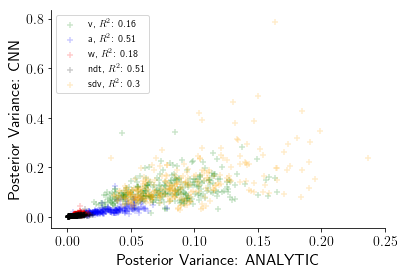

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)

my_r2vecs = get_r2_vec(estimates = ddm_sdv_cnn_100k_4096['posterior_variance'][ok_ids, :],
                       ground_truths = ddm_sdv_analytic_4096['posterior_variance'][ok_ids, :]
                       )

ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 0],
           ddm_sdv_cnn_100k_4096['posterior_variance'][ok_ids, 0], 
           color = 'green', 
           alpha = 0.2, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 1], 
           ddm_sdv_cnn_100k_4096['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.2, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a  
ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 2], 
           ddm_sdv_cnn_100k_4096['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.2, 
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 3],
           ddm_sdv_cnn_100k_4096['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.2, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt
ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 4],
           ddm_sdv_cnn_100k_4096['posterior_variance'][ok_ids, 4],
           color = 'orange', 
           alpha = 0.2, 
           marker = '+',
           label = r'sdv, $R^2$: ' + my_r2vecs[4]) # ndt

ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: CNN", size = 16)
ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')

fig_dir = os.getcwd() + '/figures/cnn/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_sdv_analytic_vs_cnn_100k_n_4096_posterior_variance_constraint.svg',
            format = 'svg',
            transparent = True,
            frameon = False)

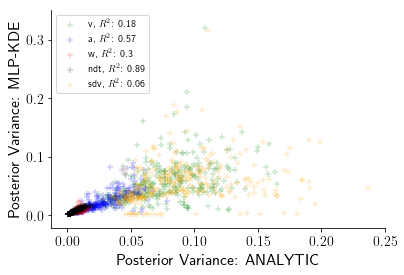

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)

my_r2vecs = get_r2_vec(estimates = ddm_sdv_mlp_100k_4096['posterior_variance'][ok_ids, :],
                       ground_truths = ddm_sdv_analytic_4096['posterior_variance'][ok_ids, :])

ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 0],
           ddm_sdv_mlp_100k_4096['posterior_variance'][ok_ids, 0], 
           color = 'green', 
           alpha = 0.2, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 1], 
           ddm_sdv_mlp_100k_4096['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.2, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a 
ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 2], 
           ddm_sdv_mlp_100k_4096['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.2, 
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 3],
           ddm_sdv_mlp_100k_4096['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.2, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt
ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 4],
           ddm_sdv_mlp_100k_4096['posterior_variance'][ok_ids, 4],
           color = 'orange', 
           alpha = 0.2, 
           marker = '+',
           label = r'sdv, $R^2$: ' + my_r2vecs[4]) # ndt

ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: MLP-KDE", size = 16)
ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')

fig_dir = os.getcwd() + '/figures/mlp/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_sdv_analytic_vs_mlp_100k_n_4096_posterior_variance_constraint.svg',
            format = 'svg',
            transparent = True,
            frameon = False)

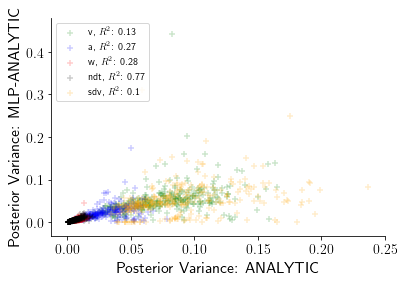

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)


my_r2vecs = get_r2_vec(estimates = ddm_sdv_mlp_analytic_4096['posterior_variance'][ok_ids, :],
                       ground_truths = ddm_sdv_analytic_4096['posterior_variance'][ok_ids, :])

ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 0],
           ddm_sdv_mlp_analytic_4096['posterior_variance'][ok_ids, 0], 
           color = 'green', 
           alpha = 0.2, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 1], 
           ddm_sdv_mlp_analytic_4096['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.2, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a 
ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 2], 
           ddm_sdv_mlp_analytic_4096['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.2, 
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 3],
           ddm_sdv_mlp_analytic_4096['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.2, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt
ax.scatter(ddm_sdv_analytic_4096['posterior_variance'][ok_ids, 4],
           ddm_sdv_mlp_analytic_4096['posterior_variance'][ok_ids, 4],
           color = 'orange',
           alpha = 0.2, 
           marker = '+',
           label = r'sdv, $R^2$: ' + my_r2vecs[4]) # ndt

ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: MLP-ANALYTIC", size = 16)
ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')

fig_dir = os.getcwd() + '/figures/mlp/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_sdv_analytic_vs_mlp_analytic_n_4096_posterior_variance_constraint.svg',
            format = 'svg',
            transparent = True,
            frameon = False)

In [121]:
ddm_sdv_mlp_analytic_1024 = pickle.load(open('/Users/afengler/OneDrive/project_nn_likelihoods/data/analytic/ddm_sdv/method_comparison/dnnregressor_ddm_sdv_analytic_05_23_20_05_55_22/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_1024_init_mle.pickle', 
                     'rb'))
ddm_sdv_mlp_20k_1024 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/data/kde/ddm_sdv/method_comparison/dnnregressor_ddm_sdv_05_23_20_03_16_07/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_1024_init_mle.pickle', 
                     'rb'))
ddm_sdv_mlp_100k_1024 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/data/kde/ddm_sdv' + \
                     '/method_comparison/dnnregressor_ddm_sdv_09_26_20_00_52_02/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_1024_init_mle.pickle', 
                     'rb'))
ddm_sdv_analytic_1024 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/data/analytic/ddm_sdv/method_comparison/analytic/summary_elife_slice_post_samp_data_param_recov_unif_reps_1_n_1024_init_mle.pickle', 
                     'rb'))
ddm_sdv_cnn_100k_1024 = pickle.load(open('/users/afengler/OneDrive/project_nn_likelihoods/eLIFE_exps/summaries/IS_summary_elife_ddm_sdv_N_1024.pickle', 
                                     'rb'))

new_ids_mlp_20k = []
new_ids_mlp_100k = []
new_ids_mlp_analytic = []
new_ids_analytic = []
new_ids_cnn_100k = []

# filter for 1024 ddm
for i in range(990):
    eq_cnt_0 = 0
    eq_cnt_1 = 0
    eq_cnt_2 = 0
    eq_cnt_3 = 0
    for j in range(1000):
        if np.array_equal(ddm_sdv_analytic_1024['gt'][i, :], ddm_sdv_mlp_20k_1024['gt'][j, :]):
            append_id_20k = j
            eq_cnt_2 += 1
        if np.array_equal(ddm_sdv_analytic_1024['gt'][i, :], ddm_sdv_mlp_100k_1024['gt'][j, :]):
            append_id_100k = j
            eq_cnt_0 += 1
        if np.array_equal(ddm_sdv_analytic_1024['gt'][i, :], ddm_sdv_mlp_analytic_1024['gt'][j, :]):
            append_id_mlp_analytic = j
            eq_cnt_1 += 1
        if np.array_equal(ddm_sdv_analytic_1024['gt'][i, :], ddm_sdv_cnn_100k_1024['gt'][j, :]):
            append_id_cnn_100k = j
            eq_cnt_3 += 1

    if eq_cnt_0 == 0 or eq_cnt_1 == 0 or eq_cnt_2 == 0 or eq_cnt_3 == 0:
        pass
#         print(eq_cnt_0)
#         print(eq_cnt_1)
#         print(eq_cnt_2)
#         print(ddm_sdv_analytic_1024['gt'][i, :])
#         print(i)
    
    else:
        new_ids_mlp_20k.append(append_id_20k)
        new_ids_mlp_100k.append(append_id_100k)
        new_ids_mlp_analytic.append(append_id_mlp_analytic)
        new_ids_analytic.append(i)
        new_ids_cnn_100k.append(append_id_cnn_100k)
    if i % 100 == 0:
        print(i)
              
ddm_sdv_analytic_1024['gt'] = ddm_sdv_analytic_1024['gt'][new_ids_analytic, :] 
ddm_sdv_analytic_1024['posterior_samples'] = ddm_sdv_analytic_1024['posterior_samples'][new_ids_analytic, :, :]
ddm_sdv_analytic_1024['data'] = ddm_sdv_analytic_1024['data'][new_ids_analytic, : , :]

ddm_sdv_mlp_20k_1024['gt'] = ddm_sdv_mlp_20k_1024['gt'][new_ids_mlp_20k, :]
ddm_sdv_mlp_20k_1024['posterior_samples'] = ddm_sdv_mlp_20k_1024['posterior_samples'][new_ids_mlp_20k, :, :]
ddm_sdv_mlp_20k_1024['data'] = ddm_sdv_mlp_20k_1024['data'][new_ids_mlp_20k, : , :]


ddm_sdv_mlp_100k_1024['gt'] = ddm_sdv_mlp_100k_1024['gt'][new_ids_mlp_100k, :]
ddm_sdv_mlp_100k_1024['posterior_samples'] = ddm_sdv_mlp_100k_1024['posterior_samples'][new_ids_mlp_100k, :, :]
ddm_sdv_mlp_100k_1024['data'] = ddm_sdv_mlp_100k_1024['data'][new_ids_mlp_100k, : , :]

ddm_sdv_mlp_analytic_1024['gt'] = ddm_sdv_mlp_analytic_1024['gt'][new_ids_mlp_analytic, :]
ddm_sdv_mlp_analytic_1024['posterior_samples'] = ddm_sdv_mlp_analytic_1024['posterior_samples'][new_ids_mlp_analytic, :, :]
ddm_sdv_mlp_analytic_1024['data'] = ddm_sdv_mlp_analytic_1024['data'][new_ids_mlp_analytic, : , :]

ddm_sdv_cnn_100k_1024['gt'] = ddm_sdv_cnn_100k_1024['gt'][new_ids_cnn_100k, :]
ddm_sdv_cnn_100k_1024['posterior_samples'] = ddm_sdv_cnn_100k_1024['posterior_samples'][new_ids_cnn_100k, :, :]
ddm_sdv_cnn_100k_1024['data'] = ddm_sdv_cnn_100k_1024['data'][new_ids_cnn_100k, : , :]


# # Filter out unbalanced datasets
ok_ids = np.abs(np.sum(ddm_sdv_analytic_1024['data'][:, :, 1], axis = 1)) < 3686

ddm_sdv_analytic_1024['posterior_variance'] = np.sqrt(ddm_sdv_analytic_1024['posterior_samples'].var(axis = 1))
ddm_sdv_mlp_20k_1024['posterior_variance'] = np.sqrt(ddm_sdv_mlp_20k_1024['posterior_samples'].var(axis = 1))
ddm_sdv_mlp_100k_1024['posterior_variance'] = np.sqrt(ddm_sdv_mlp_100k_1024['posterior_samples'].var(axis = 1))
ddm_sdv_mlp_analytic_1024['posterior_variance'] = np.sqrt(ddm_sdv_mlp_analytic_1024['posterior_samples'].var(axis = 1))
ddm_sdv_cnn_100k_1024['posterior_variance'] = np.sqrt(ddm_sdv_cnn_100k_1024['posterior_samples'].var(axis = 1))

0
100
200
300
400
500
600
700
800
900


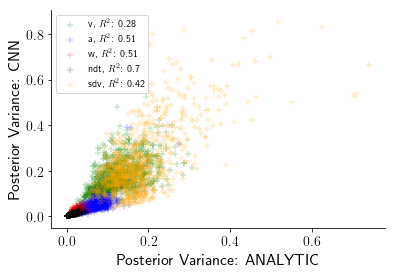

In [122]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)

my_r2vecs = get_r2_vec(estimates = ddm_sdv_cnn_100k_1024['posterior_variance'][ok_ids, :],
                       ground_truths = ddm_sdv_analytic_1024['posterior_variance'][ok_ids, :])

ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids,0],
           ddm_sdv_cnn_100k_1024['posterior_variance'][ok_ids, 0], 
           color = 'green', 
           alpha = 0.2, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids,1], 
           ddm_sdv_cnn_100k_1024['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.2, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a 
ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids,2], 
           ddm_sdv_cnn_100k_1024['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.2,
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids, 3],
           ddm_sdv_cnn_100k_1024['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.2, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt
ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids, 4],
           ddm_sdv_cnn_100k_1024['posterior_variance'][ok_ids, 4],
           color = 'orange', 
           alpha = 0.2, 
           marker = '+',
           label = r'sdv, $R^2$: ' + my_r2vecs[4]) # ndt


ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: CNN", size = 16)
ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')

fig_dir = os.getcwd() + '/figures/cnn/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_sdv_analytic_vs_cnn_100k_n_1024_posterior_variance.svg',
            format = 'svg',
            transparent = True,
            frameon = False)

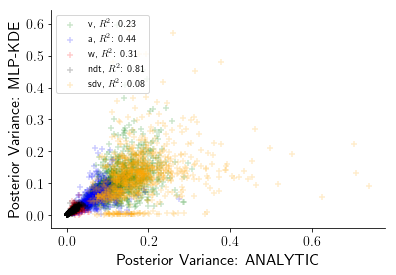

In [123]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)

my_r2vecs = get_r2_vec(estimates = ddm_sdv_mlp_100k_1024['posterior_variance'][ok_ids, :],
                       ground_truths = ddm_sdv_analytic_1024['posterior_variance'][ok_ids,:])

ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids,0],
           ddm_sdv_mlp_100k_1024['posterior_variance'][ok_ids, 0], 
           color = 'green', 
           alpha = 0.2, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids,1], 
           ddm_sdv_mlp_100k_1024['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.2, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a 
ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids,2], 
           ddm_sdv_mlp_100k_1024['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.2, 
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids, 3],
           ddm_sdv_mlp_100k_1024['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.2, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt
ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids, 4],
           ddm_sdv_mlp_100k_1024['posterior_variance'][ok_ids, 4],
           color = 'orange', 
           alpha = 0.2, 
           marker = '+',
           label = r'sdv, $R^2$: ' + my_r2vecs[4]) # ndt


ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: MLP-KDE", size = 16)
ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')

fig_dir = os.getcwd() + '/figures/mlp/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_sdv_analytic_vs_mlp_100k_n_1024_posterior_variance.svg',
            format = 'svg',
            transparent = True,
            frameon = False)

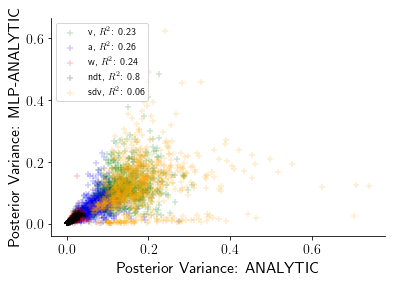

In [124]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.despine(right = True)

my_r2vecs = get_r2_vec(estimates = ddm_sdv_mlp_analytic_1024['posterior_variance'][ok_ids, :],
                       ground_truths = ddm_sdv_analytic_1024['posterior_variance'][ok_ids,:])

ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids,0],
           ddm_sdv_mlp_analytic_1024['posterior_variance'][ok_ids, 0], 
           color = 'green', 
           alpha = 0.2, 
           marker = '+',
           label = r'v, $R^2$: ' + my_r2vecs[0]) # v
ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids,1], 
           ddm_sdv_mlp_analytic_1024['posterior_variance'][ok_ids, 1],
           color = 'blue', 
           alpha = 0.2, 
           marker = '+',
           label = r'a, $R^2$: ' + my_r2vecs[1]) # a 
ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids,2], 
           ddm_sdv_mlp_analytic_1024['posterior_variance'][ok_ids, 2], 
           color = 'red', 
           alpha = 0.2, 
           marker = '+',
           label = r'w, $R^2$: ' + my_r2vecs[2]) # w
ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids, 3],
           ddm_sdv_mlp_analytic_1024['posterior_variance'][ok_ids, 3],
           color = 'black', 
           alpha = 0.2, 
           marker = '+',
           label = r'ndt, $R^2$: ' + my_r2vecs[3]) # ndt
ax.scatter(ddm_sdv_analytic_1024['posterior_variance'][ok_ids, 4],
           ddm_sdv_mlp_analytic_1024['posterior_variance'][ok_ids, 4],
           color = 'orange', 
           alpha = 0.2, 
           marker = '+',
           label = r'sdv, $R^2$: ' + my_r2vecs[4]) # ndt

ax.set_xlabel('Posterior Variance: ANALYTIC', size = 16)
ax.set_ylabel("Posterior Variance: MLP-ANALYTIC", size = 16)
ax.tick_params(axis = 'x',
               labelsize = 14)
ax.tick_params(axis = 'y',
               labelsize = 14)
ax.legend(loc = 'upper left')

fig_dir = os.getcwd() + '/figures/mlp/posterior_variance/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
plt.savefig(fig_dir + 'ddm_sdv_analytic_vs_mlp_analytic_n_1024_posterior_variance.svg',
            format = 'svg',
            transparent = True,
            frameon = False)